# Get data

In [6]:
!wget https://storage.googleapis.com/aibootcamp/data/plants.zip

--2018-03-29 22:35:01--  https://storage.googleapis.com/aibootcamp/data/plants.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1808677454 (1.7G) [application/zip]
Saving to: ‘plants.zip’

plants.zip          100%[===================>]   1.68G   138MB/s    in 15s     

2018-03-29 22:35:17 (113 MB/s) - ‘plants.zip’ saved [1808677454/1808677454]



In [7]:
!ls

datalab  plants.zip


In [0]:
!unzip -q plants.zip

In [9]:
!ls

datalab  plants  plants.zip


In [0]:
!rm plants.zip

In [0]:
!unzip -q plants/train.zip

In [12]:
!ls

datalab  plants  train


In [13]:
!pip install Keras

In [14]:
!pip install tqdm

    100% |████████████████████████████████| 61kB 3.0MB/s 


# Iterators

In [0]:
def fibonacci_generator():
  a = 0
  b = 1
  while True:
    yield a
    a, b = b, a + b
    

In [0]:
fib_gen = fibonacci_generator()

In [12]:
next(fib_gen)

0

In [13]:
next(fib_gen)

1

In [14]:
next(fib_gen)

1

In [15]:
next(fib_gen)

2

In [16]:
next(fib_gen)

3

# File moving

In [33]:
import os
from tqdm import tqdm

root_dir = 'train'
target_root = 'validation'

if not os.path.isdir(target_root):
  os.mkdir(target_root)

for plant in tqdm(os.listdir(root_dir)):
  plant_path = os.path.join(root_dir,plant)
  target_plant_path = os.path.join(target_root,plant)
  
  if not os.path.isdir(target_plant_path):
    os.mkdir(target_plant_path)
    
    
  files = os.listdir(plant_path)
  for i in range(12):
    source_path = os.path.join(plant_path,files[i])
    dest_path = os.path.join(target_plant_path,files[i])
    os.rename(source_path,dest_path)

100%|██████████| 12/12 [00:00<00:00, 1099.04it/s]


In [18]:
!ls validation/Black-grass

163c13912.png  594485a0c.png  b024eeb75.png  e2b2a20b2.png
2f6bc240a.png  686132594.png  b937353c0.png  ebd2350df.png
39e9bf4c7.png  9443199bb.png  d0ad9c78b.png  f84089a55.png


# Keras generator & Logistic Regression

In [0]:
import datetime
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [0]:
import seaborn as sns
sns.set(); np.random.seed(0)
%matplotlib inline

In [0]:
from tqdm import tqdm

In [0]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2

In [0]:
imgen = ImageDataGenerator(rescale=1/255)

In [24]:
train_generator = imgen.flow_from_directory('train',batch_size=32, target_size=(150,150))

Found 4606 images belonging to 12 classes.


In [25]:
validation_generator = imgen.flow_from_directory('validation',
                                                 batch_size=32, 
                                                 target_size=(150,150))

Found 144 images belonging to 12 classes.


In [0]:
from keras.layers import Flatten,Dense, Activation
from keras.models import Sequential

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(12))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics = ['acc'])

In [0]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= 5515 // 32, 
                    validation_data=validation_generator, 
                    validation_steps= 144//32)

Epoch 1/10
172/172 [==============================] - 68s 397ms/step - loss: 12.6801 - acc: 0.1080 - val_loss: 13.2599 - val_acc: 0.1562
Epoch 2/10
172/172 [==============================] - 68s 396ms/step - loss: 12.2760 - acc: 0.1309 - val_loss: 12.1587 - val_acc: 0.1406
Epoch 3/10
123/172 [====================>.........] - ETA: 18s - loss: 11.8094 - acc: 0.1567172/172 [==============================] - 67s 387ms/step - loss: 11.7950 - acc: 0.1533 - val_loss: 10.7529 - val_acc: 0.1250
Epoch 4/10
172/172 [==============================] - 66s 386ms/step - loss: 11.6447 - acc: 0.1659 - val_loss: 9.5564 - val_acc: 0.2422
Epoch 5/10
169/172 [============================>.] - ETA: 1s - loss: 11.1230 - acc: 0.1674172/172 [==============================] - 68s 393ms/step - loss: 11.1044 - acc: 0.1680 - val_loss: 8.7388 - val_acc: 0.2109
Epoch 6/10
172/172 [==============================] - 65s 379ms/step - loss: 10.5921 - acc: 0.1728 - val_loss: 8.5795 - val_acc: 0.2422
Epoch 7/10
172/172 [

# Stack VGG

In [1]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
vgg_model = VGG16(include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
for layer in vgg_model.layers:
  layer.trainable = False

In [0]:
finetune = Sequential(layers = vgg_model.layers)

In [0]:
finetune.add(Flatten())
finetune.add(Dense(12))
finetune.add(Activation('softmax'))

In [22]:
finetune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
finetune.compile(loss='categorical_crossentropy',
                 optimizer='adam', 
                 metrics = ['acc'])

In [32]:
finetune.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= 5515 // 32, 
                    validation_data=validation_generator, 
                    validation_steps= 144//32)

Epoch 1/10
172/172 [==============================] - 74s 430ms/step - loss: 1.5665 - acc: 0.4871 - val_loss: 1.2699 - val_acc: 0.5625
Epoch 2/10
172/172 [==============================] - 71s 412ms/step - loss: 0.9621 - acc: 0.7154 - val_loss: 1.0961 - val_acc: 0.6328
Epoch 3/10
125/172 [====================>.........] - ETA: 17s - loss: 0.7842 - acc: 0.7728172/172 [==============================] - 69s 401ms/step - loss: 0.7534 - acc: 0.7862 - val_loss: 0.9763 - val_acc: 0.7266
Epoch 4/10
172/172 [==============================] - 72s 418ms/step - loss: 0.6250 - acc: 0.8218 - val_loss: 0.9774 - val_acc: 0.7188
Epoch 5/10
169/172 [============================>.] - ETA: 1s - loss: 0.5394 - acc: 0.8550172/172 [==============================] - 71s 413ms/step - loss: 0.5394 - acc: 0.8550 - val_loss: 0.8934 - val_acc: 0.7188
Epoch 6/10
172/172 [==============================] - 71s 413ms/step - loss: 0.4618 - acc: 0.8822 - val_loss: 0.8831 - val_acc: 0.6797
Epoch 7/10
172/172 [===========

# Preprocess and Save VGG

In [0]:
!pip install bcolz

    100% |████████████████████████████████| 1.4MB 906kB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/78/ba/ff/0ac6555a3e174aa78eb8cf32c798a5bde0de5a2bc10c654e9b
Successfully built bcolz


In [0]:
import bcolz
def save_array(fname, arr): 
  c=bcolz.carray(arr, rootdir=fname, mode='w')
  c.flush()
  
def load_array(fname): 
  return bcolz.open(fname)[:]


In [0]:
source = 'train'
target = 'train_proc'

if not os.path.isdir(target):
  os.mkdir(target)

for plant in os.listdir(source):
  target_path = os.path.join(target,plant)
  if not os.path.isdir(target_path):
    os.mkdir(target_path)
  source_path = os.path.join(source,plant)
  print('Processing',plant)
  for file in tqdm(os.listdir(source_path)):
    img = cv2.imread(os.path.join(source_path,file))
    img = cv2.resize(img, (150, 150)) 
    img = np.expand_dims(img,0)
    out = vgg_model.predict(img)
    save_array(os.path.join(target_path,file), out)

  2%|▏         | 4/246 [00:00<00:06, 37.05it/s]

Processing Common wheat


  1%|          | 4/452 [00:00<00:11, 39.80it/s]

Processing Sugar beet


  2%|▏         | 5/248 [00:00<00:05, 48.52it/s]

Processing Maize


  1%|          | 6/704 [00:00<00:12, 54.62it/s]

Processing Common Chickweed


  2%|▏         | 6/321 [00:00<00:07, 42.84it/s]

Processing Black-grass


  1%|          | 6/807 [00:00<00:16, 48.49it/s]

Processing Loose Silky-bent


  2%|▏         | 6/264 [00:00<00:04, 52.53it/s]

Processing Shepherd’s Purse


  1%|          | 6/531 [00:00<00:09, 54.17it/s]

Processing Fat Hen


  1%|▏         | 5/336 [00:00<00:06, 49.98it/s]

Processing Cleavers


  1%|          | 6/596 [00:00<00:11, 52.17it/s]

Processing Scentless Mayweed


  1%|          | 6/568 [00:00<00:10, 54.03it/s]

Processing Small-flowered Cranesbill


  1%|          | 5/442 [00:00<00:10, 42.16it/s]

Processing Charlock


100%|██████████| 442/442 [00:09<00:00, 46.28it/s]


In [0]:
source = 'validation'
root_dir = 'validation_proc'


if not os.path.isdir(root_dir):
  os.mkdir(root_dir)

for plant in os.listdir(source):
  target_path = os.path.join(root_dir,plant)
  if not os.path.isdir(target_path):
    os.mkdir(target_path)
  source_path = os.path.join(source,plant)
  print('Processing',plant)
  for file in tqdm(os.listdir(source_path)):
    img = cv2.imread(os.path.join(source_path,file))
    img = cv2.resize(img, (150, 150)) 
    img = img / 255
    img = np.expand_dims(img,0)
    out = vgg_model.predict(img)
    save_array(os.path.join(target_path,file), out)

 33%|███▎      | 4/12 [00:00<00:00, 38.10it/s]

Processing Common wheat


 33%|███▎      | 4/12 [00:00<00:00, 34.39it/s]

Processing Sugar beet


 42%|████▏     | 5/12 [00:00<00:00, 45.71it/s]

Processing Maize


 50%|█████     | 6/12 [00:00<00:00, 54.09it/s]

Processing Common Chickweed


 50%|█████     | 6/12 [00:00<00:00, 53.44it/s]

Processing Black-grass


 50%|█████     | 6/12 [00:00<00:00, 55.14it/s]

Processing Loose Silky-bent


 50%|█████     | 6/12 [00:00<00:00, 54.87it/s]

Processing Shepherd’s Purse


 50%|█████     | 6/12 [00:00<00:00, 56.31it/s]

Processing Fat Hen


 50%|█████     | 6/12 [00:00<00:00, 54.79it/s]

Processing Cleavers


 50%|█████     | 6/12 [00:00<00:00, 56.78it/s]

Processing Scentless Mayweed


 50%|█████     | 6/12 [00:00<00:00, 54.69it/s]

Processing Small-flowered Cranesbill


 42%|████▏     | 5/12 [00:00<00:00, 49.12it/s]

Processing Charlock


100%|██████████| 12/12 [00:00<00:00, 49.45it/s]


In [0]:
ls

datalab/  Segmented/  train_proc/  Validation/  validation_proc/


In [0]:
root_dir = 'train_proc'
dirs = os.listdir(root_dir)

In [0]:
paths = []
targets = []
for dir in dirs:
  path = os.path.join(root_dir,dir)
  for file in os.listdir(path):
    if file.endswith(".png"):
      paths.append(os.path.join(path,file))
      targets.append(dir)

In [0]:
nclasses = len(np.unique(targets))
nitems = len(targets)
print('Found {} items belonging to {} classes'.format(nitems,nclasses))

Found 5515 items belonging to 12 classes


In [0]:
labelenc = LabelEncoder()
int_targets = labelenc.fit_transform(targets)
onehot_enc = OneHotEncoder(sparse=False)
int_targets = int_targets.reshape(len(int_targets), 1)
onehot_targets = onehot_enc.fit_transform(int_targets)

In [0]:
indices = np.arange(len(paths))
np.random.shuffle(indices)

In [0]:
def bcz_imgen(root_dir, batch_size = 32): 
  dirs = os.listdir(root_dir)
  paths = []
  targets = []
  for dir in dirs:
    path = os.path.join(root_dir,dir)
    for file in os.listdir(path):
      paths.append(os.path.join(path,file))
      targets.append(dir)
   
  nclasses = len(np.unique(targets))
  nitems = len(targets)
  
  labelenc = LabelEncoder()
  int_targets = labelenc.fit_transform(targets)
  onehot_enc = OneHotEncoder(sparse=False)
  int_targets = int_targets.reshape(len(int_targets), 1)
  onehot_targets = onehot_enc.fit_transform(int_targets)
  
  indices = np.arange(len(paths))
  np.random.shuffle(indices)
  
  while True:
    image_stack = []
    target_stack = []
    for index in indices:
      path = paths[index]
      target = onehot_targets[index]
      img = load_array(path)

      image_stack.append(img)
      target_stack.append(target)

      if len(image_stack) == batch_size:
        images = np.concatenate(image_stack,axis=0)

        yield images, np.stack(target_stack)
        image_stack = []
        target_stack = []

In [0]:
train_gen = bcz_imgen('train_proc')
val_gen = bcz_imgen('validation_proc')

In [0]:
yld, tar = next(gen)

In [0]:
tar.shape

(32, 12)

In [0]:
from keras.layers import Conv2D, Dropout
model = Sequential()
#model.add(Conv2D(256,1,input_shape=(4,4,512)))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(12))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
model.fit_generator(train_gen,
                    epochs=2,
                    steps_per_epoch= 5515 // 32, 
                    validation_data=val_gen, 
                    validation_steps= 144//32)

Epoch 1/2
172/172 [==============================] - 3s 15ms/step - loss: 1.6133 - acc: 0.7356 - val_loss: 3.0247 - val_acc: 0.1797
Epoch 2/2
172/172 [==============================] - 3s 17ms/step - loss: 0.3882 - acc: 0.9253 - val_loss: 3.2615 - val_acc: 0.2266


In [0]:
os.listdir('train')

['Small-flowered Cranesbill',
 'Sugar beet',
 'Common Chickweed',
 'Scentless Mayweed',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Charlock',
 'Cleavers',
 'Black-grass',
 'Maize',
 'Loose Silky-bent']

# Custom Generator

In [0]:
!wget https://storage.googleapis.com/aibootcamp/data/plants.zip

--2018-03-25 18:49:23--  https://storage.googleapis.com/aibootcamp/data/plants.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1808677454 (1.7G) [application/zip]
Saving to: ‘plants.zip’

plants.zip          100%[===================>]   1.68G   142MB/s    in 12s     

2018-03-25 18:49:36 (143 MB/s) - ‘plants.zip’ saved [1808677454/1808677454]



In [0]:
!unzip plants.zip

Archive:  plants.zip
   creating: plants/
 extracting: plants/sample_submission.csv.zip  
 extracting: plants/train.zip        
 extracting: plants/test.zip         


In [0]:
!unzip plants/train.zip

# Rule based preprocessing

In [0]:
def cieluv(img, target):
    # adapted from https://www.compuphase.com/cmetric.htm
    img = img.astype('int')
    
    aR, aG, aB = img[:,:,0], img[:,:,1], img[:,:,2]
    bR, bG, bB = target
    
    rmean = ((aR + bR) / 2.).astype('int')
    r2 = np.square(aR - bR)
    g2 = np.square(aG - bG)
    b2 = np.square(aB - bB)
    
    # final sqrt removed for speed; please square your thresholds accordingly
    result = (((512+rmean)*r2)>>8) + 4*g2 + (((767-rmean)*b2)>>8)
    
    return result

In [0]:
import matplotlib.pyplot as plt

In [0]:
def ocv_imgen(root_dir,batch_size = 32, 
              rescale = 1/255, 
              target_size = (150,150)):
  dirs = os.listdir(root_dir)
  paths = []
  targets = []
  for dir in dirs:
    path = os.path.join(root_dir,dir)
    for file in os.listdir(path):
      paths.append(os.path.join(path,file))
      targets.append(dir)
   
  nclasses = len(np.unique(targets))
  nitems = len(targets)
  
  labelenc = LabelEncoder()
  int_targets = labelenc.fit_transform(targets)
  onehot_enc = OneHotEncoder(sparse=False)
  int_targets = int_targets.reshape(len(int_targets), 1)
  onehot_targets = onehot_enc.fit_transform(int_targets)
  
  indices = np.arange(len(paths))
  np.random.shuffle(indices)
  while True:
    image_stack = []
    target_stack = []
    for index in indices:
      path = paths[index]
      target = onehot_targets[index]
      
      img = plt.imread(path)
      
      
      img = np.round(img * 255).astype('ubyte')[:,:,:3]
      img = cv2.resize(img, (150,150))
      img_filter = (
        (cieluv(img, (71, 86, 38)) > 1600)
        & (cieluv(img, (65,  79,  19)) > 1600)
        & (cieluv(img, (95,  106,  56)) > 1600)
        & (cieluv(img, (56,  63,  43)) > 500)
      )
      
      img[img_filter] = 0
      img = cv2.medianBlur(img, 9)
      
      image_stack.append(img)
      target_stack.append(target)
      if len(image_stack) == batch_size:
        images = np.stack(image_stack)
        images = np.divide(images,rescale)
        yield images, np.stack(target_stack)
        image_stack = []
        target_stack = []

In [0]:
train_gen = ocv_imgen('train', batch_size=32)
val_gen = ocv_imgen('validation', batch_size=32)

In [37]:
finetune.fit_generator(train_gen,
                    epochs=10,
                    steps_per_epoch= 5515 // 32, 
                    validation_data=val_gen, 
                    validation_steps= 144//32)

Epoch 1/10
172/172 [==============================] - 149s 864ms/step - loss: 13.9050 - acc: 0.1312 - val_loss: 14.8809 - val_acc: 0.0547
Epoch 2/10
172/172 [==============================] - 149s 865ms/step - loss: 13.9473 - acc: 0.1286 - val_loss: 14.5041 - val_acc: 0.0781
Epoch 3/10
116/172 [===================>..........] - ETA: 43s - loss: 13.7937 - acc: 0.1374172/172 [==============================] - 145s 842ms/step - loss: 13.7134 - acc: 0.1415 - val_loss: 14.5223 - val_acc: 0.0781
Epoch 4/10
172/172 [==============================] - 149s 865ms/step - loss: 13.8021 - acc: 0.1374 - val_loss: 14.5154 - val_acc: 0.0781
Epoch 5/10
159/172 [==========================>...] - ETA: 10s - loss: 13.7849 - acc: 0.1388172/172 [==============================] - 149s 865ms/step - loss: 13.7815 - acc: 0.1386 - val_loss: 14.4916 - val_acc: 0.1016
Epoch 6/10
172/172 [==============================] - 145s 841ms/step - loss: 13.8563 - acc: 0.1341 - val_loss: 14.5080 - val_acc: 0.0781
Epoch 7/10

In [0]:
import matplotlib.pyplot as plt

In [0]:
a,b = next(gen)

In [0]:
a.shape

(5, 150, 150, 3)

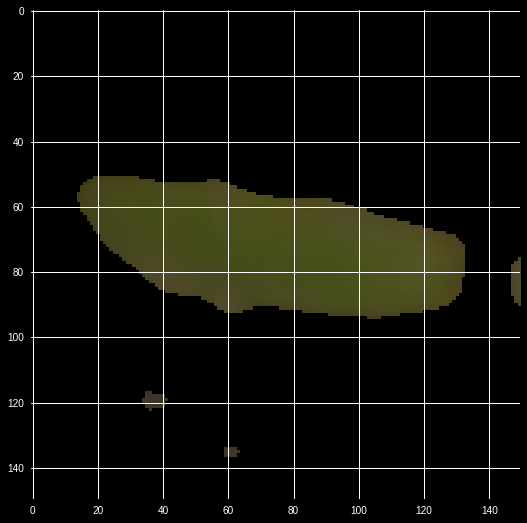

In [0]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('dark_background')
plt.imshow(a[0])

# Benchmarking generators, not used in book

In [0]:
# Keras generator

times = []
for i in tqdm(range(1000)):
  start = datetime.datetime.now()
  dat = next(generator)
  end = datetime.datetime.now()
  diff = end - start
  ms_elapsed = diff.total_seconds() * 1000
  times.append(ms_elapsed)


100%|██████████| 1000/1000 [01:53<00:00,  8.84it/s]


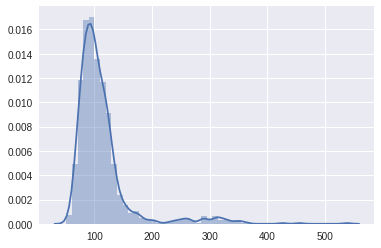

In [0]:
sns.distplot(times)

In [0]:
mean_t = np.mean(times)
max_t = np.max(times)
min_t = np.min(times)
std_t = np.std(times)
print('Mean time: {:f} \n Max time: {:f} \n Min time: {:f} \n Standard deviation: {:f}'.format(mean_t,max_t,min_t,std_t))

Mean time: 112.494005 
 Max time: 538.344000 
 Min time: 51.504000 
 Standard deviation: 51.480851


In [0]:
# Custom generator
times = []
for i in tqdm(range(1000)):
  start = datetime.datetime.now()
  
  dat = next(gen)
  
  end = datetime.datetime.now()
  diff = end - start
  ms_elapsed = diff.total_seconds() * 1000
  times.append(ms_elapsed)


100%|██████████| 1000/1000 [01:13<00:00, 13.57it/s]


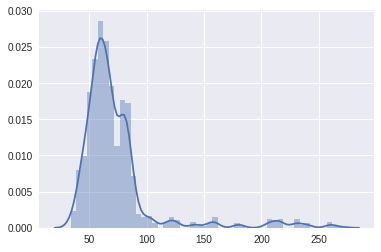

In [0]:
sns.distplot(times)

In [0]:
mean_t = np.mean(times)
max_t = np.max(times)
min_t = np.min(times)
std_t = np.std(times)
print('Mean time: {:f} \n Max time: {:f} \n Min time: {:f} \n Standard deviation: {:f}'.format(mean_t,max_t,min_t,std_t))

Mean time: 73.185093 
 Max time: 271.268000 
 Min time: 33.525000 
 Standard deviation: 35.667303


# Random Augumentation

In [0]:
train_datagen = ImageDataGenerator(
  rescale = 1/255,
  rotation_range=90,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.1,
  horizontal_flip=True,
  fill_mode='nearest')


In [0]:
!ls train/Charlock

In [0]:
from keras.preprocessing import image
fname = 'train/Charlock/270209308.png'

In [0]:
img = image.load_img(fname, target_size=(150, 150))

In [0]:
img = image.img_to_array(img)

In [0]:
img = np.expand_dims(img,axis=0)

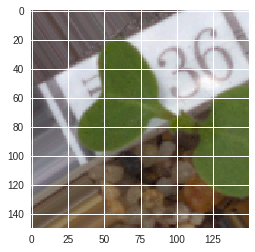

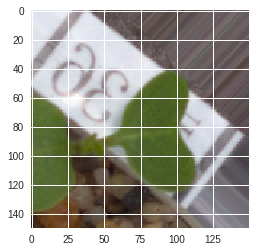

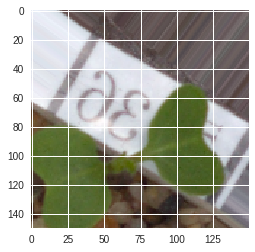

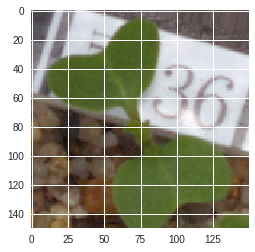

In [64]:
import matplotlib.pyplot as plt

gen = train_datagen.flow(img, batch_size=1)


for i in range(4):
    plt.figure(i)
    batch = next(gen)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
plt.show()

In [0]:
train_datagen.flow(img, batch_size=1)

In [63]:
batch.shape

(1, 150, 150, 3)

In [65]:
!pip install git+https://github.com/aleju/imgaug

  Cloning https://github.com/aleju/imgaug to /tmp/pip-legoijks-build
  Running setup.py install for imgaug ... - \ done


In [66]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


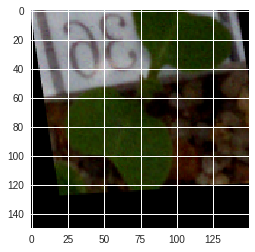

In [75]:
batch = seq.augment_images(img)
plt.imshow(batch[0])

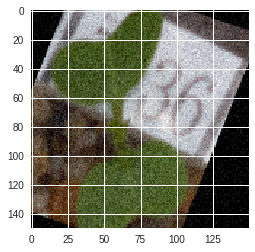

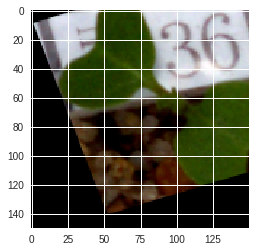

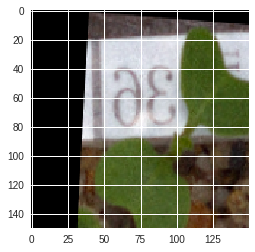

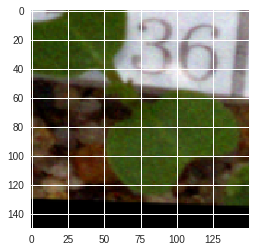

In [76]:
for i in range(4):
    plt.figure(i)
    batch = seq.augment_images(img)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
plt.show()

In [0]:
def ocv_imgen_aug(root_dir,batch_size = 32, 
                  rescale = 1/255, 
                  target_size = (150,150)):
  
  dirs = os.listdir(root_dir)
  paths = []
  targets = []
  for dir in dirs:
    path = os.path.join(root_dir,dir)
    for file in os.listdir(path):
      paths.append(os.path.join(path,file))
      targets.append(dir)
   
  nclasses = len(np.unique(targets))
  nitems = len(targets)
  
  labelenc = LabelEncoder()
  int_targets = labelenc.fit_transform(targets)
  onehot_enc = OneHotEncoder(sparse=False)
  int_targets = int_targets.reshape(len(int_targets), 1)
  onehot_targets = onehot_enc.fit_transform(int_targets)
  
  indices = np.arange(len(paths))
  np.random.shuffle(indices)
  while True:
    image_stack = []
    target_stack = []
    for index in indices:
      path = paths[index]
      target = onehot_targets[index]
      
      img = cv2.imread(path)
      img = cv2.resize(img, (150,150))
      
  
      
      image_stack.append(img)
      target_stack.append(target)
      if len(image_stack) == batch_size:
        images = np.stack(image_stack)
        
        images = seq.augment_images(images)
        
        images = np.divide(images,rescale)
        yield images, np.stack(target_stack)
        image_stack = []
        target_stack = []

In [0]:
gen = ocv_imgen_aug('train')

In [0]:
a, b = next(gen)

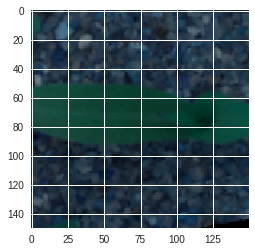

In [100]:
plt.imshow(a[2])

In [0]:
import numpy as np

from keras.applications.vgg16 import VGG16
from keras import backend as K


In [0]:
# dimensions of the generated pictures for each filter.
img_width = 224
img_height = 224


layer_name = 'block1_conv1'

# For conv layers
filter_index = 0

# For final layer
output_index = 184

In [90]:
# build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet')
print('Model loaded.')

model.summary()


Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0      

In [0]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

In [0]:
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

In [99]:
print('Processing filter %d' % filter_index)


# we build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output

# Uncomment for outputs
loss = K.mean(model.output[:, output_index])


#Uncomment for Conv Layers
#loss = K.mean(layer_output[:, :, :, filter_index])


# this is the placeholder for the input images
input_img = model.input
# we compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]



# normalization trick: we normalize the gradient
grads = normalize(grads)



# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])




Processing filter 0


In [0]:
input_img_data = np.random.rand(1,img_height,img_width,3)

In [108]:
# step size for gradient ascent
alpha = 0.01


# we run gradient ascent for 20 steps
for i in range(500):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * alpha

    print('Current loss value:', loss_value)
    if loss_value <= 0.:
        # some filters get stuck to 0, we can skip them
        print('warning zero loss')
        break

Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current loss value: 0.9999945
Current lo

Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current loss value: 0.99999475
Current 

In [0]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
img = deprocess_image(input_img_data[0])
    

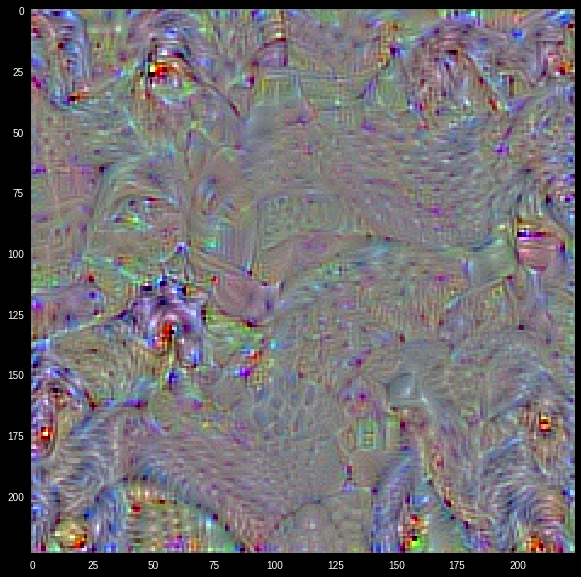

In [111]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) 
plt.imshow(img)
ax.grid(False)

In [0]:
from scipy.misc import imsave

In [0]:
imsave('test.png',img)

In [51]:
!ls

block5_conv3_filter_0.png  datalab		     test.png
block5_conv3_filter_1.png  stitched_filters_8x8.png


In [0]:
from google.colab import files


files.download('test.png')